In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import asc, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Starter_Code\Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

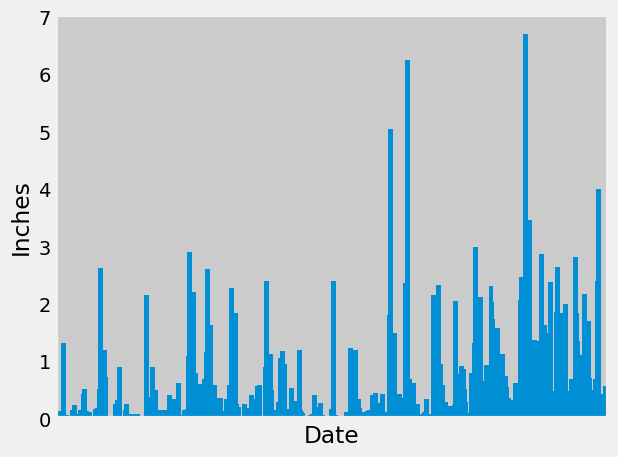

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_row = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date_str = recent_date_row[0]  

# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(recent_date_str, '%Y-%m-%d').date()
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date < recent_date).filter(measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date < recent_date).filter(measurement.date > year_ago).all()
precip_df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])

# Use Pandas Plotting with Matplotlib to plot the data
precip_df['Precipitation'].plot(kind='bar', width=20, xlabel='Date', ylabel='Inches' ) 
plt.xticks(visible=False)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station ,
        func.count(measurement.station).label('count')]
station_row_count = session.query(*sel).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()

station_row_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel2 = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
most_active_station = session.query(*sel2).filter(measurement.station == 'USC00519281').all()
most_active_station

[(54.0, 85.0, 71.66378066378067)]

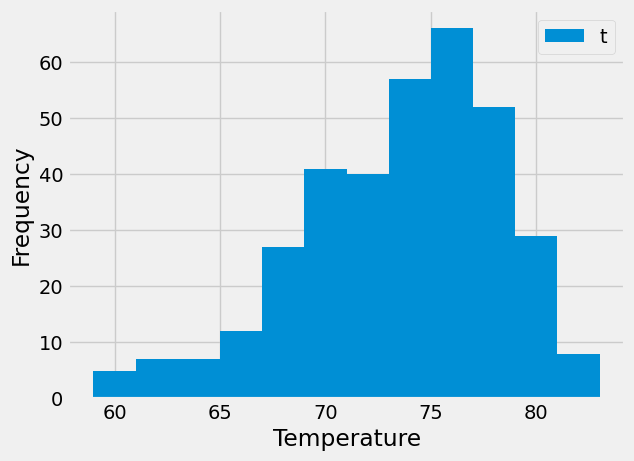

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date < recent_date).filter(measurement.date > year_ago).all()

most_active_tobs = [temp[0] for temp in most_active_tobs]

# Create a histogram using the flattened values
plt.hist(most_active_tobs, bins=12)

plt.legend('tobs',loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close Session

In [16]:
# Close Session
session.close()